Data for this project was taken from: http://insideairbnb.com/get-the-data.html

In [1]:
!pip install xgboost

In [2]:
!pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
import xgboost as xg
import time
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

D:\Python\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Python\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [92]:
data = pd.read_csv("listings.csv")

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3344,https://www.airbnb.com/rooms/3344,2.019110e+13,11/22/2019,"White House/Center City, 1 roommate",This listing is for one roommate in a 2BR/2BA ...,"You have found The One, but be sure to message...",This listing is for one roommate in a 2BR/2BA ...,none,This is the hottest neighborhood in D.C. at th...,...,f,f,moderate,f,f,2,1,1,0,0.09
1,3362,https://www.airbnb.com/rooms/3362,2.019110e+13,11/22/2019,"Convention Center Rowhouse & In Law: 2 Units, 4BR",An architect-designed rowhouse featuring a lar...,This listing features our 19th century Victori...,An architect-designed rowhouse featuring a lar...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,5,5,0,0,1.33
2,3670,https://www.airbnb.com/rooms/3670,2.019110e+13,11/22/2019,Beautiful Sun-Lit U Street 1BR/1BA,Convenient location perfect for business trave...,"Sunny, bright private room. Includes a queen s...",Convenient location perfect for business trave...,none,We are nicely situated on a quiet residential ...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.39
3,3686,https://www.airbnb.com/rooms/3686,2.019110e+13,11/22/2019,Vita's Hideaway,IMPORTANT NOTES * Carefully read and be sure t...,IMPORTANT NOTES * Airbnb keeps accurate track ...,IMPORTANT NOTES * Carefully read and be sure t...,none,We love that our neighborhood is up and coming...,...,f,f,moderate,f,f,2,0,2,0,0.64
4,3771,https://www.airbnb.com/rooms/3771,2.019110e+13,11/22/2019,Mt. Pleasant,"Clean, convenient and welcoming home. Bedroom...","Spacious, clean, convenient and welcoming home...","Clean, convenient and welcoming home. Bedroom...",none,NaN,...,f,f,moderate,f,f,1,0,1,0,0.01


In [8]:
data.shape

(9152, 106)

Here we see that our original data set had 9,152 rows and 106 columns. 

# DATA CLEANING

In [7]:
#All of the columns in the dataset. 
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

106 columns is a lot to take in, and just by reading through the list we can definitely take out a vast majority of them due to the fact that it will not help in predicting Airbnb prices. 

In [93]:
data = data.drop(['id','zipcode','listing_url','name','summary','bed_type','scrape_id','last_scraped','space','description','neighborhood_overview','experiences_offered','notes','transit','access','house_rules','square_feet','interaction','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','street','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','market','smart_location','country_code','country','is_location_exact','weekly_price','monthly_price','extra_people','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','review_scores_accuracy','review_scores_location','review_scores_value','requires_license','license','jurisdiction_names','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month'], axis=1)

In [13]:
data.shape

(9152, 23)

This is much better. The number of columns changed from 106 to 23!

Now that the Data set is cleaned out, let's look for any missing values. 

In [94]:
#Shows the number of missing values within each column. 
for col in data.columns:
    print('Number of Missing Values in ' + col + ':', len(data[col][data[col].isnull()]))

Number of Missing Values in neighbourhood: 34
Number of Missing Values in latitude: 0
Number of Missing Values in longitude: 0
Number of Missing Values in property_type: 0
Number of Missing Values in room_type: 0
Number of Missing Values in accommodates: 0
Number of Missing Values in bathrooms: 10
Number of Missing Values in bedrooms: 9
Number of Missing Values in beds: 13
Number of Missing Values in amenities: 0
Number of Missing Values in price: 0
Number of Missing Values in security_deposit: 2953
Number of Missing Values in cleaning_fee: 1655
Number of Missing Values in guests_included: 0
Number of Missing Values in minimum_nights: 0
Number of Missing Values in maximum_nights: 0
Number of Missing Values in availability_30: 0
Number of Missing Values in number_of_reviews: 0
Number of Missing Values in review_scores_rating: 1856
Number of Missing Values in review_scores_cleanliness: 1862
Number of Missing Values in review_scores_checkin: 1867
Number of Missing Values in review_scores_

Obviously there's an issue with some of the property posted. Some places have no values for beds, bedrooms, bathrooms, etc. Even with places that have the value 0 for these columns are inconsistent and should be removed. 

In [95]:
# We are going to remove all of the NaN values from the dataframe. 
original = len(data)
data = data.dropna(how='any', subset=['property_type', 'bedrooms', 'beds', 'bathrooms'])

# Changing price and cleaning fee to float. 
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))
data['cleaning_fee'] = (data['cleaning_fee'].str.replace(r'[^-+\d.]','').astype(float))
data['security_deposit'] = (data['security_deposit'].str.replace(r'[^-+\d.]','').astype(float))

# Removing all of the rows with inconsistent values

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

The next step would be to deal with cleaning_fee, security deposit, and the other columns regarding review scores. We will convert all the empty values to 0. 

In [96]:
# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]
data = data[~data['review_scores_cleanliness'].isnull()]
data = data[~data['review_scores_checkin'].isnull()]
data = data[~data['review_scores_communication'].isnull()]
data['cleaning_fee'] = data['cleaning_fee'].fillna(0)
data['security_deposit'] = data['security_deposit'].fillna(0)

In [97]:
#Shows the number of missing values within each column. 
for col in data.columns:
    print('Number of Missing Values in ' + col + ':', len(data[col][data[col].isnull()]))

Number of Missing Values in neighbourhood: 0
Number of Missing Values in latitude: 0
Number of Missing Values in longitude: 0
Number of Missing Values in property_type: 0
Number of Missing Values in room_type: 0
Number of Missing Values in accommodates: 0
Number of Missing Values in bathrooms: 0
Number of Missing Values in bedrooms: 0
Number of Missing Values in beds: 0
Number of Missing Values in amenities: 0
Number of Missing Values in price: 0
Number of Missing Values in security_deposit: 0
Number of Missing Values in cleaning_fee: 0
Number of Missing Values in guests_included: 0
Number of Missing Values in minimum_nights: 0
Number of Missing Values in maximum_nights: 0
Number of Missing Values in availability_30: 0
Number of Missing Values in number_of_reviews: 0
Number of Missing Values in review_scores_rating: 0
Number of Missing Values in review_scores_cleanliness: 0
Number of Missing Values in review_scores_checkin: 0
Number of Missing Values in review_scores_communication: 0
N

Now all the data entries have no missing values. 

In [99]:
data.shape

(6496, 23)

After cleaning the data, we went from 9,152 rows to 6,496 

This looks amazing. The only column with missing values is summary, which isn't too important because it only describes what the property is like. The other columns can compensate for that. 

Now let's deal with the categorical values.

In [100]:
data.property_type.value_counts()

Apartment             2700
House                 1435
Townhouse             1209
Condominium            525
Guest suite            390
Bed and breakfast       49
Serviced apartment      45
Loft                    40
Guesthouse              36
Other                   16
Bungalow                15
Hostel                  14
Villa                    5
Boutique hotel           4
Aparthotel               3
Tiny house               2
Boat                     2
Barn                     2
Cottage                  2
Dome house               1
Resort                   1
Name: property_type, dtype: int64

In [101]:
# Replacing categories that are types of houses or apartments
data.property_type.replace({
    'Townhouse': 'House',
    'Condominium': 'Apartment',
    'Guest suite': 'Apartment',
    'Serviced apartment': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Serviced apartment': 'House',
    'Loft': 'Apartment'  
    }, inplace=True)

# Replacing other categories with 'other'
data.loc[~data.property_type.isin(['House', 'Apartment', 'Townhouse']), 'property_type'] = 'Other'

There are a ton of amenities that we need to sort through as well, otherwise the models won't work. 

In [102]:
# Example of amenities listed
data.amenities[:1].values

array(['{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,Doorman,Gym,Breakfast,Elevator,"Buzzer/wireless intercom",Heating,"Suitable for events",Washer,Dryer,"Smoke detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,Iron,"Laptop friendly workspace","Hot water","Long term stays allowed","Host greets you","Paid parking on premises"}'],
      dtype=object)

We made created a list of amenities and we are going to categorize some of them into more specific amenities. 

In [103]:
# Creating a set of all possible amenities
amenities_list = list(data.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Ethernet con

In [104]:
data.loc[data['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
data.loc[data['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
data.loc[data['amenities'].str.contains('Amazon Echo|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
data.loc[data['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
data.loc[data['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
data.loc[data['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
data.loc[data['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
data.loc[data['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
data.loc[data['amenities'].str.contains('TV'), 'tv'] = 1
data.loc[data['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
data.loc[data['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
data.loc[data['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
data.loc[data['amenities'].str.contains('Elevator'), 'elevator'] = 1
data.loc[data['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
data.loc[data['amenities'].str.contains('Family/kid friendly|Children|children|Crib|Baby bath|Baby monitor|Babysitter recommendations'), 'child_friendly'] = 1
data.loc[data['amenities'].str.contains('parking'), 'parking'] = 1
data.loc[data['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
data.loc[data['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
data.loc[data['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
data.loc[data['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
data.loc[data['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
data.loc[data['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
data.loc[data['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
data.loc[data['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
data.loc[data['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
data.loc[data['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
data.loc[data['amenities'].str.contains('Step-free access|Wheelchair|Accessible|Accessible-height bed|Accessible-height toilet'), 'accessible'] = 1
data.loc[data['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

D:\Python\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [105]:
data.shape

(6496, 51)

In [106]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = data.iloc[:,52:].columns
data[cols_to_replace_nulls] = data[cols_to_replace_nulls].fillna(0)

# Dropping the original amenity feature
data.drop('amenities', axis=1, inplace=True)

In [107]:
data.head()

,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,Downtown/Penn Quarter,38.90126,-77.02857,Apartment,Private room,1,1.0,1.0,1.0,55.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Shaw,38.91046,-77.01933,House,Entire home/apt,16,3.5,4.0,6.0,433.0,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,U Street Corridor,38.91842,-77.02750,House,Private room,2,1.0,1.0,1.0,75.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Anacostia,38.86314,-76.98836,House,Private room,1,1.0,1.0,1.0,55.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Shaw,38.91331,-77.02436,House,Private room,2,2.5,1.0,1.0,475.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
data.to_csv('data_clean.csv')

# Exploratory Data Analysis

Now that the data is clean, we can finally analyze the data. 

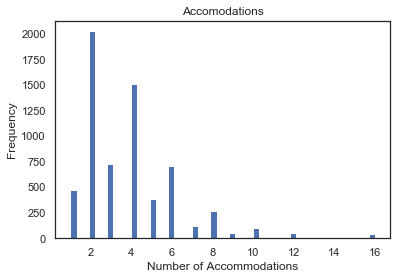

In [110]:
# visualize distribution of price (target variable)
plt.hist(data['accommodates'], bins=50)
plt.title("Accomodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

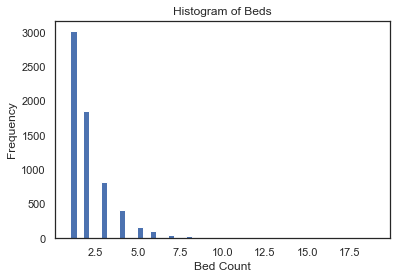

In [111]:
# visualize distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

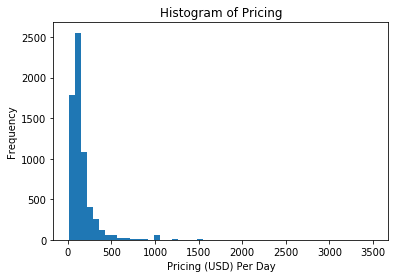

In [35]:
# visualize distribution of price (target variable)
plt.hist(data['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

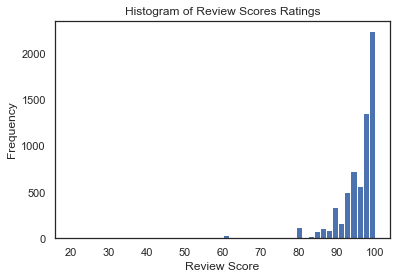

In [112]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'], bins=50)
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

The shape of these graphs are very expected. Having them skewed just shows that a majority of the properties are common to each other in terms of beds, price, accomodations, etc. 
This, however, can be a problem when we apply the dataset to our machine learning models. In order to normalize the data and help with the distribution, we will need to apply log transformation onto the numerical columns.

In [113]:
df = pd.get_dummies(data)

In [114]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,38.90126,-77.02857,1,1.0,1.0,1.0,55.0,1500.0,0.0,1,...,0,0,1,0,0,1,0,0,0,0
1,38.91046,-77.01933,16,3.5,4.0,6.0,433.0,500.0,202.0,8,...,1,0,0,0,0,0,0,1,0,0
2,38.91842,-77.02750,2,1.0,1.0,1.0,75.0,500.0,25.0,1,...,0,0,1,0,0,0,0,1,0,0
3,38.86314,-76.98836,1,1.0,1.0,1.0,55.0,0.0,0.0,1,...,0,0,1,0,0,1,0,0,0,0
6,38.91331,-77.02436,2,2.5,1.0,1.0,475.0,0.0,0.0,2,...,0,0,1,0,0,0,0,1,0,0


In [115]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

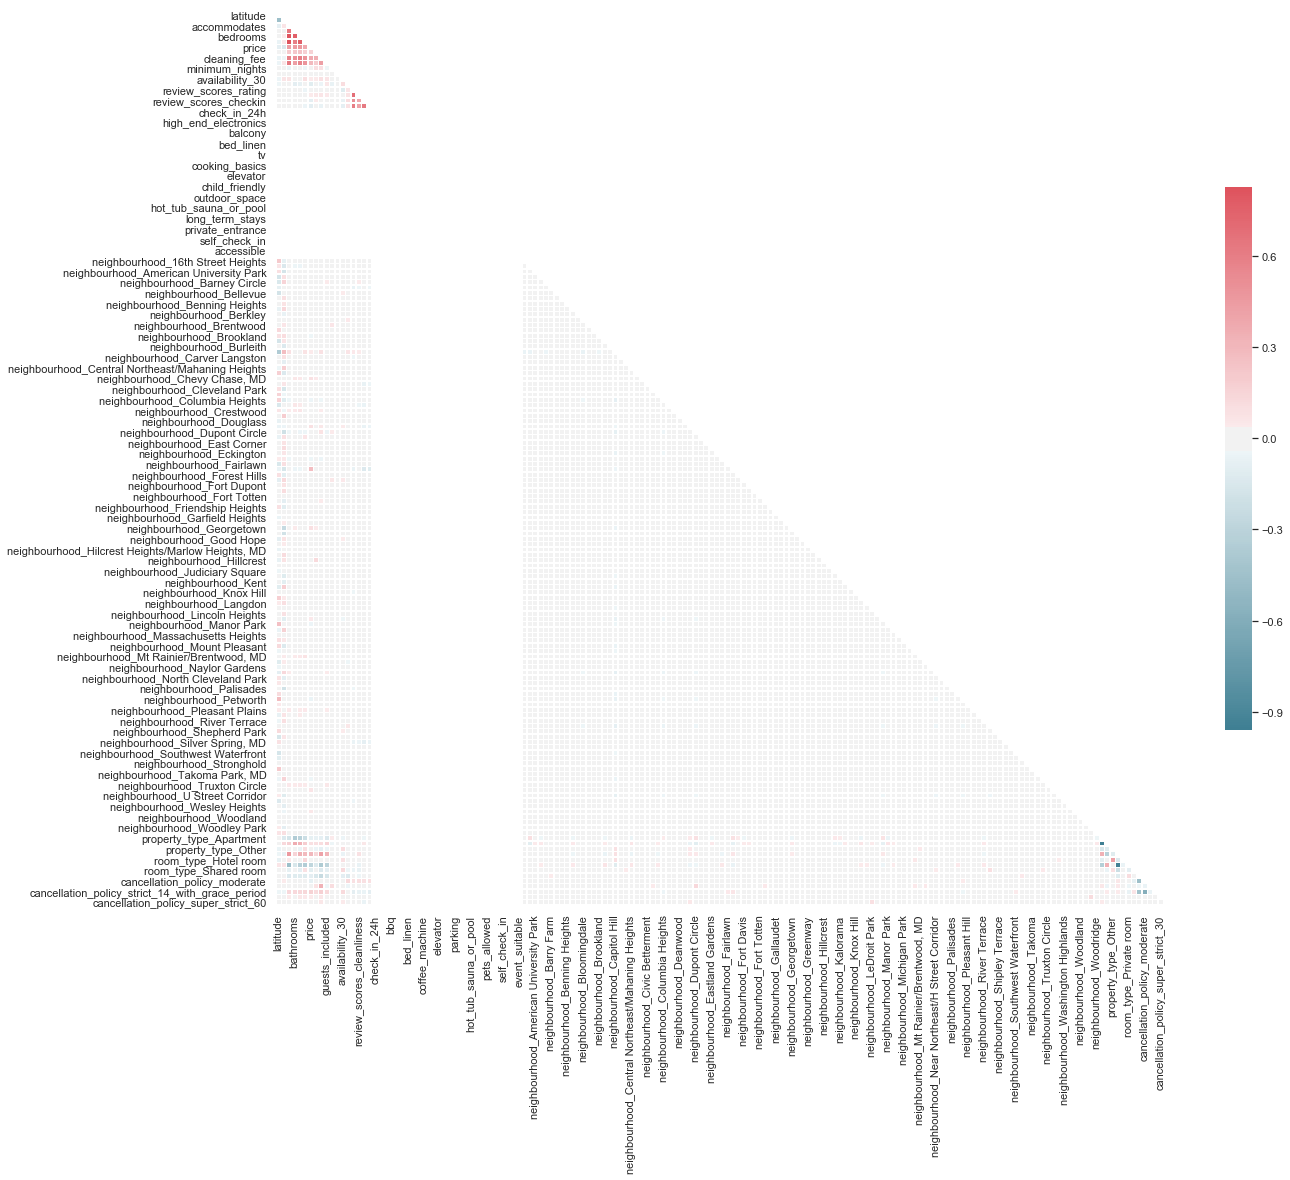

In [116]:
multi_collinearity_heatmap(df, figsize=(20,20))

In [117]:
numerical_columns = ['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'security_deposit']

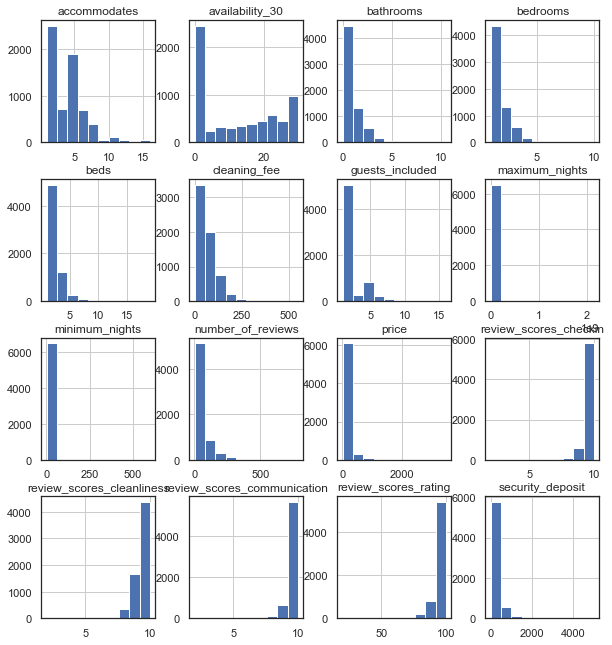

In [118]:
df[numerical_columns].hist(figsize=(10,11));

This shows the graphs of some of the numerical columns that are a part of the graph. Just like the ones before, it is skewed in one side. Let's apply log transformation so that it'll have a better distribution.

In [73]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_30']] # Removing items not to be transformed

for col in numerical_columns:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])

D:\Python\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


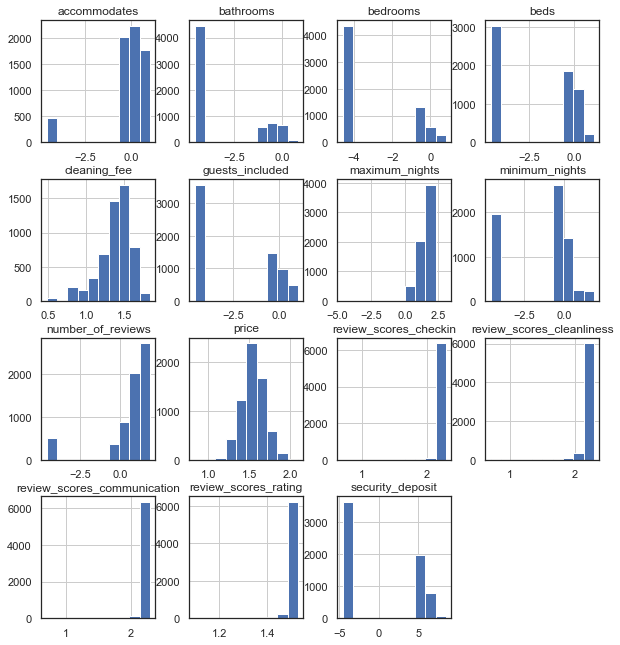

In [74]:
df[numerical_columns].hist(figsize=(10,11));

By comparing the two sets of graphs above, we can see that by applying log transformation, it helped with the distribution of a graph by a significant amount. 

In [91]:
df.shape

(6496, 167)

In [75]:
df.to_csv('data_neural.csv')

Now that our data is all set and ready to go, we can finally apply our machine learning models on them. 

# Neural Networks

Let's use XGBoost to weigh each feature and determine which ones are the most important.

In [76]:
# Separating X and y
X = df.drop('price', axis=1)
y = df.price

In [77]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=606)

In [87]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training = xgb_reg.predict(X_train)
validation = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training),4))
print("Validation MSE:", round(mean_squared_error(y_test, validation),4))
print("\nTraining r2:", round(r2_score(y_train, training),4))
print("Validation r2:", round(r2_score(y_test, validation),4))


Training MSE: 0.0014
Validation MSE: 0.0057

Training r2: 0.9313
Validation r2: 0.6984


In [88]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighbourhood_Kent,0.000000
neighbourhood_Eastland Gardens,0.000000
neighbourhood_East Corner,0.000000
neighbourhood_Marshall Heights,0.000000
neighbourhood_Deanwood,0.000000
neighbourhood_Skyland,0.000000
neighbourhood_Congress Heights,0.000000
neighbourhood_Stronghold,0.000000
"neighbourhood_Silver Spring, MD",0.000000
neighbourhood_Shepherd Park,0.000000


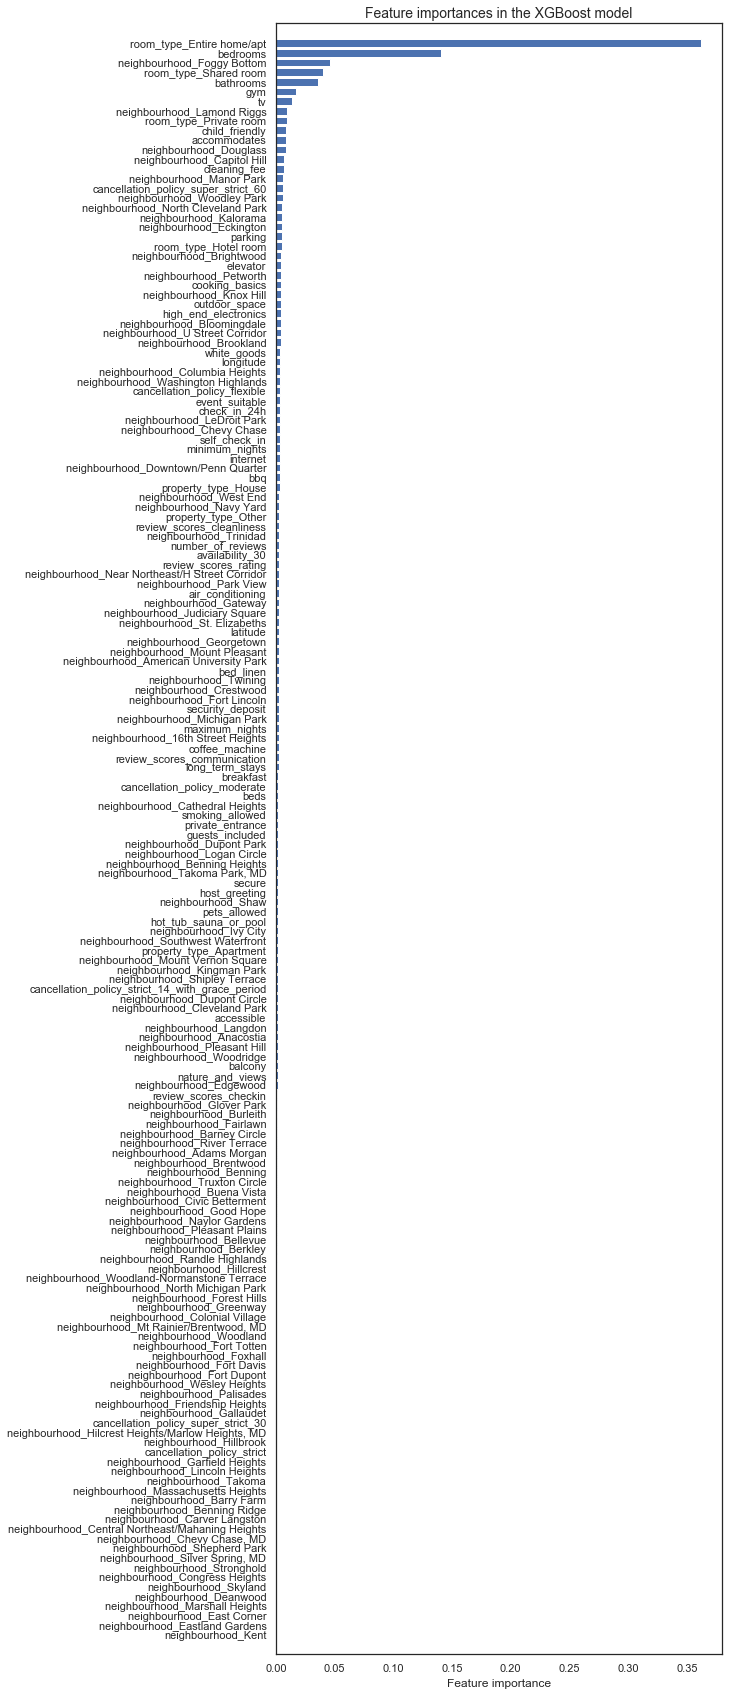

In [89]:
# Plotting feature importances
plt.figure(figsize=(8,30))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

Based on the XGBoost model, we can see that there are a number of features that have a significant amount of importance (the first 10). The rest have almost nothing. 

**The top 10 features in this dataset are:**

* Having the entire house/apt

* The number of bedrooms

* Whether the property is in Foggy bottoms

* Whether the property's room type is shared

* The number of bathrooms

* Whether the property has a gym

* Whether the property has a Television

* Whether the property is in Lamond Riggs

* Whether the Property's room type is private

* Whether the property is child_friendly




Also, with the training r2 being 0.9313 and the validation r2 being 0.6984, we can see that the model is fairly accurate. 